In [1]:
!pip install category_encoders
!pip install pydotplus
!pip install graphviz


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\loren\OneDrive\Documenten\jaar_2023-2024\Artifical inteligent\ml-challenge-thomasmore-2023-2024\AI_env\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
c:\Users\loren\OneDrive\Documenten\jaar_2023-2024\Artifical inteligent\ml-challenge-thomasmore-2023-2024\AI_env\Lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping

Accuracy: 0.7906976744186046


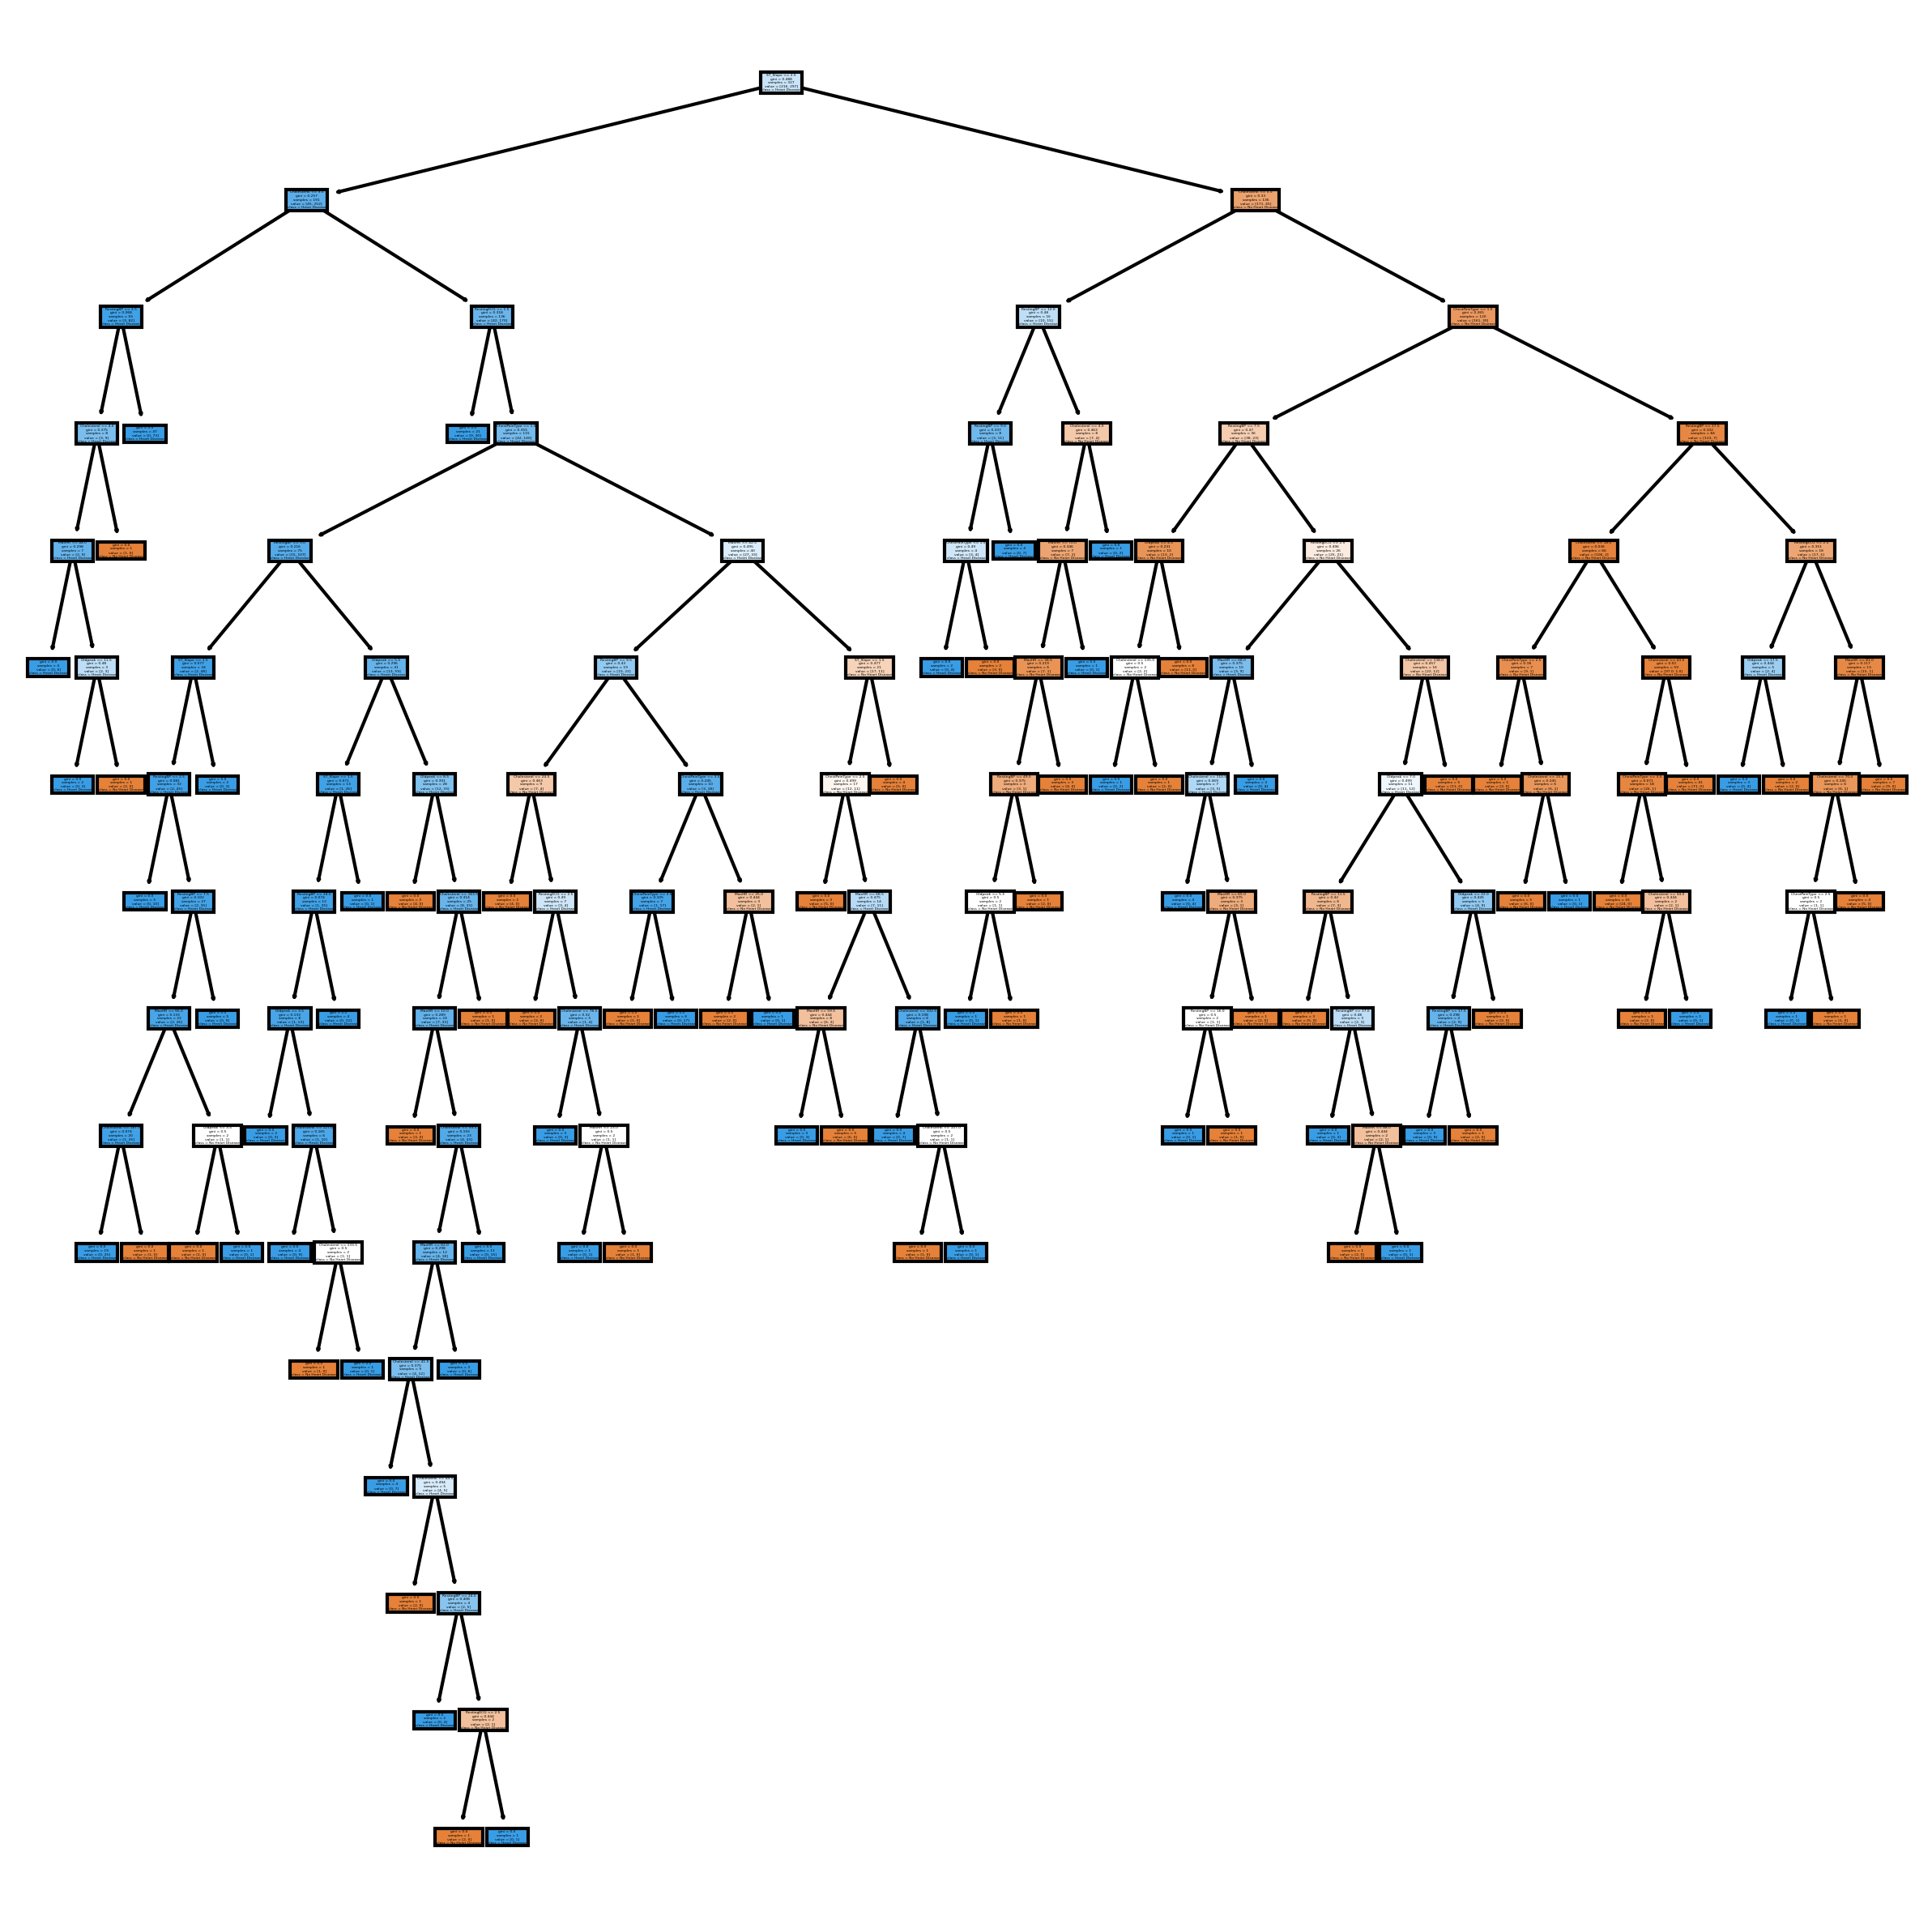

In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import category_encoders as ce

# Read the data
heart_df = pd.read_csv("train_heart.csv", sep=',')

# Define feature columns and target variable
feature_cols = ['ChestPainType','RestingBP','Cholesterol','RestingECG','MaxHR','Oldpeak','ST_Slope']
X = heart_df[feature_cols]
y = heart_df['HeartDisease']

# Encode categorical variables
ce_ord = ce.OrdinalEncoder(cols=feature_cols)
X_encoded = ce_ord.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Calculate accuracy on the testing set
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualize each decision tree in the Random Forest
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree = plot_tree(clf.estimators_[0],
                 feature_names = feature_cols, 
                 class_names=['No Heart Disease', 'Heart Disease'],
                 filled = True);
plt.show()